In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('student.csv')
# sex F(0) 591 M(1) 453
# famsize GT3(0) 738 LE3(1) 306
# Pstatus A(0) 121 T(1) 923
# Mjob at_home(0) 194 health(1) 82 other(2) 399 service(3) 239 teacher(4) 130
# Fjob at_home(0) 62 health(1) 41 other(2) 584 service(3) 292 teacher(4) 65
# higher yes(1) 955 no(0) 89
# romantic yes(1) 371 no(0) 673

In [80]:
from sklearn.preprocessing import OrdinalEncoder
columns_name = ['sex', 'famsize', 'Pstatus', 'higher', 'romantic']
encoder = OrdinalEncoder()
df[columns_name] = encoder.fit_transform(df[columns_name])

In [81]:
selected_columns = ['sex', 'age', 'Pstatus', 'famrel', 'Medu', 'Mjob', 'Fedu', 'Fjob', 'goout', 'health', 'Dalc', 'Walc']
df = df[selected_columns].copy()

In [84]:
X = df[['sex', 'age', 'Pstatus', 'famrel', 'Medu', 'Mjob', 'Fedu', 'Fjob', 'goout', 'health']]
X = pd.get_dummies(X, columns=['Mjob', 'Fjob'])

yD = df['Dalc']
yW = df['Walc']
selected = X[list(X.columns)]
interestCols = ['sex', 'age', 'Pstatus', 'famrel', 'Medu', 'Fedu', 'goout', 'health'
                      'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
                      'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher']

In [85]:
# Importing modules and libraries for our modeling
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, classification_report
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
import pickle

In [86]:
from sklearn import svm

svcD = svm.SVC(kernel='poly', degree=50, class_weight='balanced')
X_train, X_test, y_train, y_test = train_test_split(selected, yD, test_size=0.2, random_state=30)
svcD.fit(X_train, y_train)
filename = 'svcD.sav'
pickle.dump(svcD, open(filename, 'wb'))

y_pred = svcD.predict(X_test)
print(y_test, y_pred)
print(classification_report(y_test, y_pred))

951    2
3      1
820    1
681    2
751    1
      ..
543    1
133    1
720    2
191    1
190    1
Name: Dalc, Length: 209, dtype: int64 [2 1 1 2 2 4 3 1 3 2 1 1 1 1 3 2 2 1 1 1 2 1 2 1 1 1 1 1 1 2 1 2 2 1 2 1 1
 1 1 2 1 1 1 3 5 1 1 5 1 1 1 5 1 2 1 1 2 1 1 1 2 5 1 3 2 2 1 1 1 1 1 1 1 1
 1 1 1 1 5 1 1 3 5 3 1 1 2 1 1 1 1 2 1 1 1 1 4 1 1 1 1 1 1 3 1 1 2 2 1 5 2
 1 1 1 1 1 1 1 2 1 1 1 2 1 2 1 1 1 1 1 2 1 2 4 1 1 1 1 1 3 1 1 4 5 1 3 5 4
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 2 1 2 1 2 1 1 1 1 3 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 1 1 1 2 1 1]
              precision    recall  f1-score   support

           1       0.93      0.89      0.91       153
           2       0.76      0.81      0.78        36
           3       0.82      0.90      0.86        10
           4       0.00      0.00      0.00         3
           5       0.56      0.71      0.62         7

    accuracy                           0.86       209
   macro avg       0.61      0.66      0.64       209
weig

In [87]:
#print(accuracy_score(y_test, y_pred))
#print(f1_score(y_test, y_pred, average='micro'))
#print(recall_score(y_test, y_pred, average='micro'))

In [88]:
from sklearn import svm

svcW = svm.SVC(kernel='poly', degree=50, class_weight='balanced')
X_train, X_test, y_train, y_test = train_test_split(selected, yW, test_size=0.2, random_state=80)
svcW.fit(X_train, y_train)

filename = 'svcW.sav'
pickle.dump(svcW, open(filename, 'wb'))

y_pred = svcW.predict(X_test)
print(y_test, y_pred)
# print(classification_report(y_test, y_pred))

323    3
5      2
940    4
485    3
235    3
      ..
476    2
845    2
967    1
424    5
719    4
Name: Walc, Length: 209, dtype: int64 [3 1 3 3 3 1 2 4 2 1 1 4 2 4 1 2 5 2 1 1 2 3 1 2 3 2 1 4 3 2 2 4 2 1 1 1 2
 2 1 2 4 1 3 4 1 3 3 3 1 4 1 5 3 3 1 1 1 3 3 1 1 1 2 4 1 1 1 1 4 1 4 1 1 2
 3 1 1 1 1 1 4 2 1 2 1 1 3 2 3 3 1 1 1 5 1 2 5 4 1 2 5 3 1 5 1 1 2 1 2 2 2
 2 2 2 1 4 2 1 1 1 1 1 1 1 5 1 2 2 1 1 4 1 4 3 1 3 1 2 2 2 1 1 3 1 3 1 3 1
 2 2 1 2 4 1 1 1 3 3 2 1 4 2 1 3 2 1 1 2 1 5 3 5 1 3 1 2 1 1 1 4 2 3 1 1 2
 3 4 2 3 2 3 1 4 4 1 3 1 2 4 2 2 2 1 4 2 1 4 3 5]


In [39]:
modelD = XGBClassifier(n_estimators=300, max_depth=12, max_leaves=0, learning_rate=0.05, objective='multi:softmax', booster='gbtree', colsample_bytree=1, min_child_weight=1)

X_train, X_test, y_train, y_test = train_test_split(selected, yD, test_size=0.2, random_state=30)
le = LabelEncoder()
y_train = le.fit_transform(y_train)
modelD.fit(X_train, y_train)
filename = 'modelD.sav'
pickle.dump(modelD, open(filename, 'wb'))

# y_pred = modelD.predict(X_test)
# y_pred = le.inverse_transform(y_pred)
# print(classification_report(y_test, y_pred)) #0.9138755980861244

<Axes: >

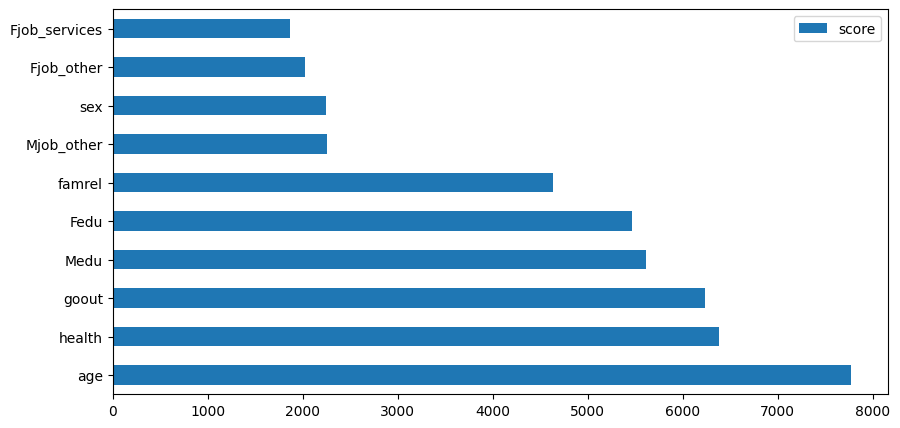

In [120]:
feature_important = modelD.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

dataD = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
dataD.nlargest(10, columns="score").plot(kind='barh', figsize = (10,5)) ## plot top 10 features

In [40]:
modelW = XGBClassifier(n_estimators=200, max_depth=9, learning_rate=0.05, objective='multi:softmax', booster='gbtree', min_child_weight=1, sampling_method='uniform')

X_train, X_test, y_train, y_test = train_test_split(selected, yW, test_size=0.2, random_state=80)
# Transform the labels [1,2,3,4,5] to [0,1,2,3,4] in order to fit the model
le = LabelEncoder()
y_train = le.fit_transform(y_train)
modelW.fit(X_train, y_train)
filename = 'modelW.sav'
pickle.dump(modelW, open(filename, 'wb'))

# y_pred = modelW.predict(X_test)
# y_pred = le.inverse_transform(y_pred)
# print(classification_report(y_test, y_pred))

<Axes: >

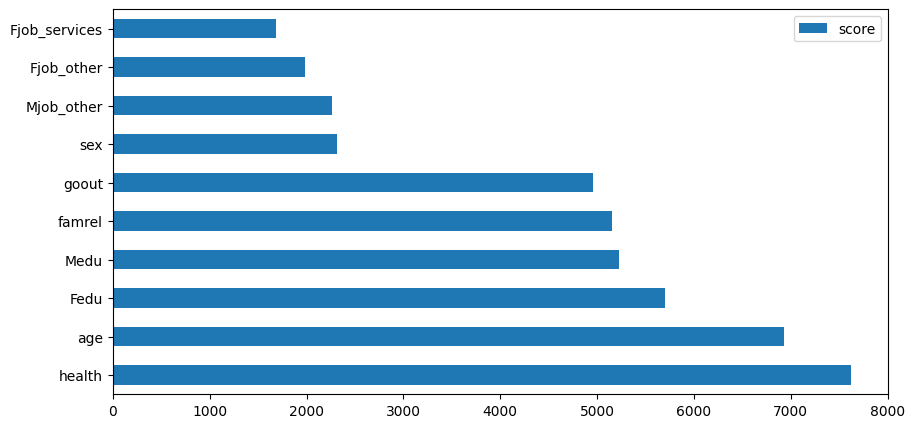

In [121]:
feature_important = modelW.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

dataW = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
dataW.nlargest(10, columns="score").plot(kind='barh', figsize = (10,5)) ## plot top 10 features

In [ ]:
plt.subplot()

In [108]:
X_train, X_test, y_train, y_test = train_test_split(selected, yD, test_size=0.2, random_state=30)
filenamesD = ['svcD', 'modelD']
resD = []
for filename in filenamesD:
    loaded_model = pickle.load(open(filename+'.sav', 'rb'))
    if filename == 'modelD':
        y_pred = loaded_model.predict(X_test)
        y_pred = le.inverse_transform(y_pred)
        resD.append(y_pred)
    else:
        resD.append(loaded_model.predict(X_test))

for y_pred in resD:
    print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           1       0.89      0.93      0.91       146
           2       0.81      0.76      0.78        38
           3       0.90      0.82      0.86        11
           4       0.00      0.00      0.00         5
           5       0.71      0.56      0.62         9

    accuracy                           0.86       209
   macro avg       0.66      0.61      0.64       209
weighted avg       0.85      0.86      0.85       209

              precision    recall  f1-score   support

           1       0.97      0.95      0.96       156
           2       0.81      0.83      0.82        35
           3       0.90      0.75      0.82        12
           4       0.00      0.00      0.00         0
           5       0.71      0.83      0.77         6

    accuracy                           0.91       209
   macro avg       0.68      0.67      0.67       209
weighted avg       0.93      0.91      0.92       209


C:\Users\monii\PycharmProjects\DSGP8\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\monii\PycharmProjects\DSGP8\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\monii\PycharmProjects\DSGP8\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [107]:
X_train, X_test, y_train, y_test = train_test_split(selected, yW, test_size=0.2, random_state=80)
filenamesD = ['svcW', 'modelW']
resW = []
for filename in filenamesD:
    loaded_model = pickle.load(open(filename+'.sav', 'rb'))
    if filename == 'modelW':
        y_pred = loaded_model.predict(X_test)
        y_pred = le.inverse_transform(y_pred)
        resW.append(y_pred)
    else:
        resW.append(loaded_model.predict(X_test))

for y_pred in resW:
    print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           1       0.85      0.79      0.82        87
           2       0.69      0.67      0.68        51
           3       0.62      0.67      0.64        36
           4       0.76      0.88      0.81        25
           5       0.55      0.60      0.57        10

    accuracy                           0.74       209
   macro avg       0.69      0.72      0.71       209
weighted avg       0.75      0.74      0.74       209

              precision    recall  f1-score   support

           1       0.86      0.76      0.81        92
           2       0.67      0.77      0.72        43
           3       0.69      0.90      0.78        30
           4       0.86      0.68      0.76        37
           5       0.55      0.86      0.67         7

    accuracy                           0.77       209
   macro avg       0.73      0.79      0.75       209
weighted avg       0.79      0.77      0.77       209


In [ ]:
# # Use Grid Search CV to find the best parameters for xgboost model
# params = {
#         'min_child_weight': [1, 5, 10],
#         'gamma': [0.5, 1, 1.5, 2, 5],
#         'subsample': [0.6, 0.8, 1.0],
#         'colsample_bytree': [0.6, 0.8, 1.0],
#         'max_depth': [3, 4, 5]
# }
# 
# xgbc = XGBClassifier()
# y_train = le.fit_transform(y_train)
# #clf = GridSearchCV(estimator=xgbc, param_grid=param_grid, scoring='accuracy', return_train_score=True, verbose=1, cv=3)
# grid_search = GridSearchCV(
#     estimator=xgbc,
#     param_grid=params,
#     scoring = 'accuracy',
#     n_jobs = 10,
#     cv = 5,
#     verbose=True,
# )
# grid_search.fit(X_train, y_train)

In [ ]:
# grid_search.best_params_

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2803e120-7517-421e-b340-ad1aa2504552' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>